In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import os
from mtcnn.mtcnn import MTCNN

In [2]:
def relu(x):
    x = (int)(x)
    if x<0:
        return 0
    else:
        return x

In [3]:
def detect_faces(cascade,image, scaleFactor = 1.1):
    image_copy = image.copy()
    detector = MTCNN()
    faces_rect = detector.detect_faces(image_copy)
    rect = np.zeros([len(faces_rect),4],dtype=int)
    for i,face in enumerate(faces_rect):
        x,y,h,w = face['box']
        rect[i][0]= relu(x-5)
        rect[i][1]= relu(y-5)
        rect[i][2]=relu(h+15)
        rect[i][3]=relu(w)
    # gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    # faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
    print(rect)
    return rect

In [4]:
def predict(model,faces):

    dir_path = 'faces/unknown/'
    # for i,face in enumerate(faces):
    cv2.imwrite(dir_path+str(1)+'.jpeg',faces)

    data = keras.preprocessing.image.ImageDataGenerator()
    gen = data.flow_from_directory('faces',target_size=(120,90),color_mode='grayscale',shuffle=False,class_mode=None)
    x = gen.next()

    
    # result=[]
    # for i,image in enumerate(x):
    a = np.argmax(model.predict(x.reshape(1,120,90,1)))
        # result.append(a)

    for fil in os.listdir(dir_path):
        os.remove(os.path.join(dir_path,fil))

    return a

In [5]:
def extract_faces(image,pos):
    faces = []
    for (x,y,h,w) in pos:
        # x,y,h,w = ce indices must be integers or None or have an p
        face = image[y:y+h,x:x+w,:]
        faces.append(face)
    return faces

In [6]:
def show_image(img,positions,gender):
    image_copy = img.copy()
    for i,(x, y, h, w) in enumerate(positions):
        if gender[i]==0:
            color = (255,0,0)
        else:
            color = (0,255,0)
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), color, 2)
    print('Number of people: ',len(gender))
    H,W,c = img.shape
    plt.figure(figsize=(H/20,W/20))    
    plt.imshow(cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print("keys:")
    print("Blue box = female")
    print("green box = male")
    print()

In [7]:
def result(image_path):
    img = cv2.imread(image_path)
    print(img.shape)
    positions = detect_faces(haar_cascade_face,img)
    faces = extract_faces(img,positions)
    gender = []
    for face in faces:
        g = predict(model,face)
        gender.append(g)
    show_image(img,positions,gender)

In [8]:
 model = keras.models.load_model('gender_classification_model')

test11.jpeg
(131, 383, 3)
[[152   0  56  47]
 [230  28  59  62]
 [306   5  70  71]]
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  3


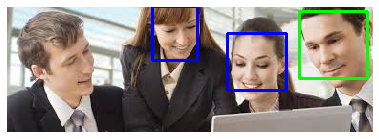

keys:
Blue box = female
green box = male

test1.jpeg
(183, 275, 3)
[[86 26 50 46]]
Found 1 images belonging to 1 classes.
Number of people:  1


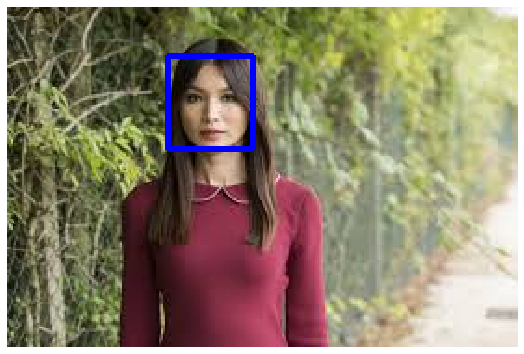

keys:
Blue box = female
green box = male

test2.jpeg
(479, 852, 3)
[[707  49  47  40]
 [ 77  55  47  39]
 [276  50  48  43]
 [517  39  48  43]]
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  4


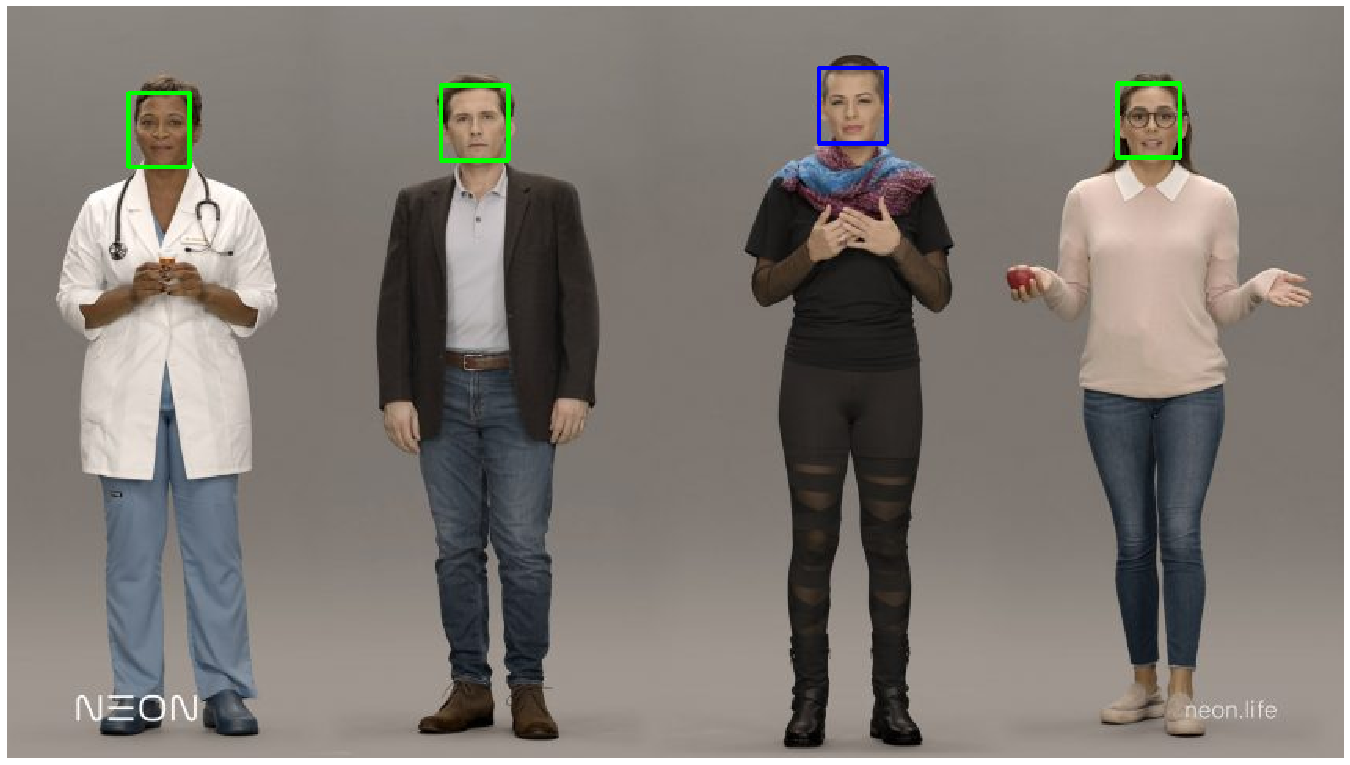

keys:
Blue box = female
green box = male

test20.jpeg
(174, 290, 3)
[[ 61   1  96 111]
 [138  45  98 102]]
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  2


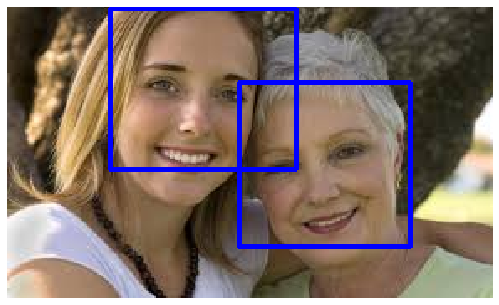

keys:
Blue box = female
green box = male

test23.jpeg
(183, 276, 3)
[[129  29  47  41]
 [ 81  21  56  53]
 [244  53  43  41]
 [193  29  53  48]
 [  0  32  50  47]
 [ 24  29  45  40]]
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  6


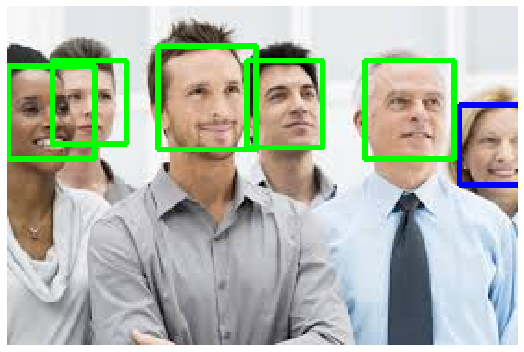

keys:
Blue box = female
green box = male

test15.jpeg
(180, 280, 3)
[[167  48  28  15]
 [125  34  29  18]
 [ 57  17  28  17]]
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  3


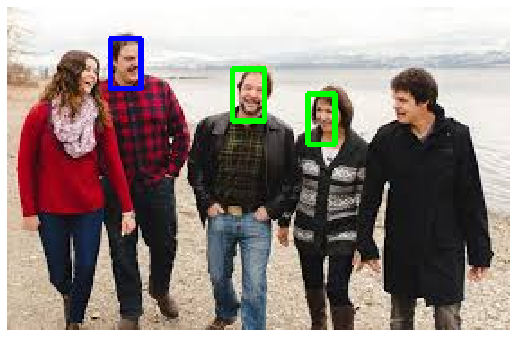

keys:
Blue box = female
green box = male

test19.jpeg
(183, 275, 3)
[[119  31  52  47]]
Found 1 images belonging to 1 classes.
Number of people:  1


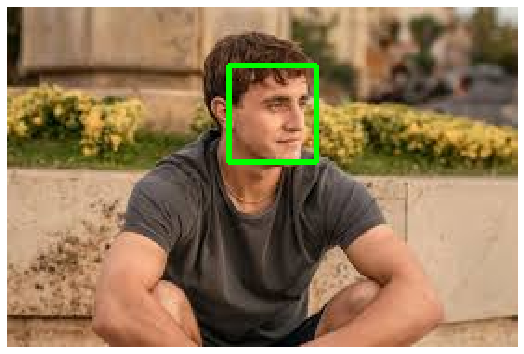

keys:
Blue box = female
green box = male

test10.jpeg
(120, 419, 3)
[]
Number of people:  0


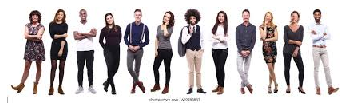

keys:
Blue box = female
green box = male

test16.jpeg
(168, 300, 3)
[[218  27  36  28]
 [113  49  35  26]
 [ 55  27  38  29]
 [164  28  39  31]]
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  4


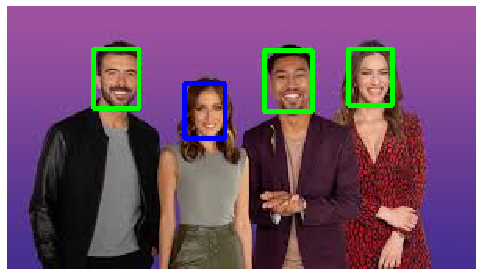

keys:
Blue box = female
green box = male

test8.jpeg
(183, 275, 3)
[[ 19  53  42  35]
 [120  47  37  26]
 [168  40  38  29]
 [205  24  41  33]
 [ 80  29  40  34]
 [ 43  55  38  30]]
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  6


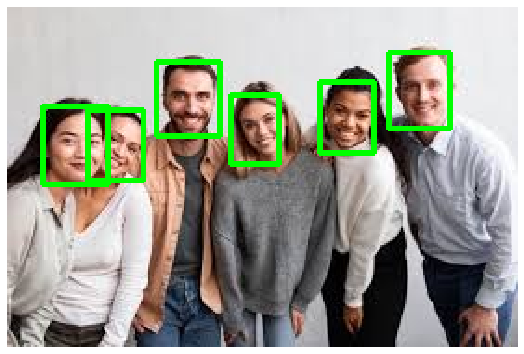

keys:
Blue box = female
green box = male

test12.jpeg
(168, 299, 3)
[[ 69  36  77  80]
 [179   0  82  78]]
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  2


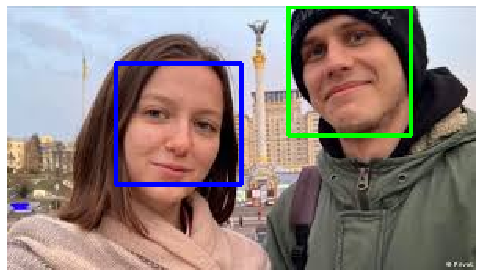

keys:
Blue box = female
green box = male

test6.jpeg
(144, 350, 3)
[[102   0  53  53]
 [237   7  52  48]]
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  2


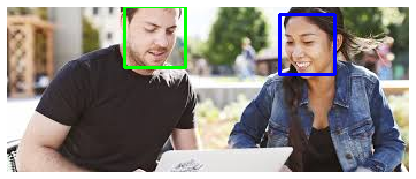

keys:
Blue box = female
green box = male

test24.jpeg
(183, 275, 3)
[[ 97  40  37  28]
 [145  50  38  30]
 [186  34  36  27]
 [122  18  34  22]]
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  4


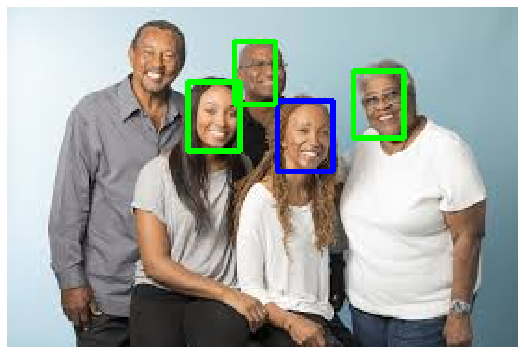

keys:
Blue box = female
green box = male

test9.jpeg
(183, 275, 3)
[[161  72  35  27]
 [ 59  75  34  24]
 [118  15  32  21]]
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  3


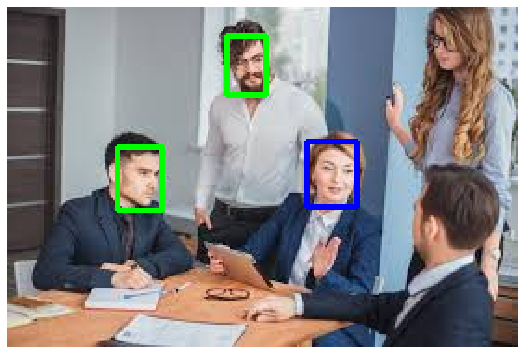

keys:
Blue box = female
green box = male

test3.jpeg
(194, 259, 3)
[[103 115  64  64]
 [ 18  59  67  70]
 [143  10  54  48]
 [161 107  74  72]
 [ 70  69  52  51]
 [ 95  17  57  55]]
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  6


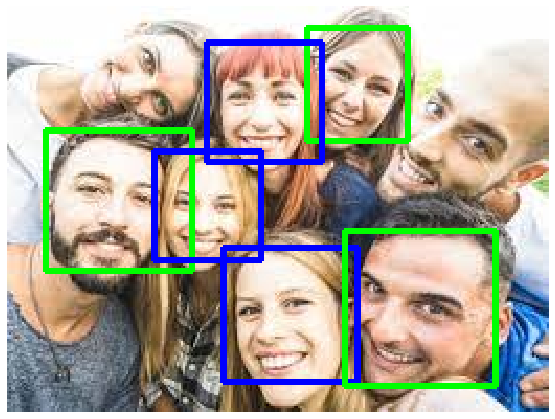

keys:
Blue box = female
green box = male

test14.jpeg
(194, 259, 3)
[[ 38  20  53  51]
 [159  54  96 105]]
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  2


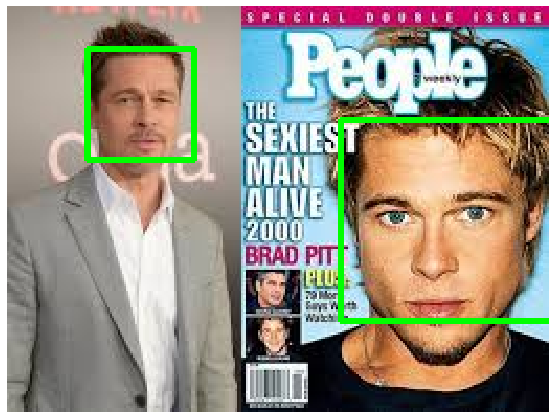

keys:
Blue box = female
green box = male

test22.jpeg
(168, 300, 3)
[[117  30  60  57]]
Found 1 images belonging to 1 classes.
Number of people:  1


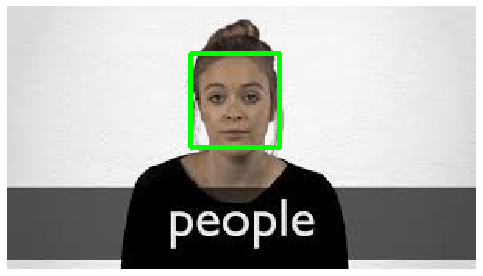

keys:
Blue box = female
green box = male

test5.jpeg
(183, 275, 3)
[[116  19  48  46]]
Found 1 images belonging to 1 classes.
Number of people:  1


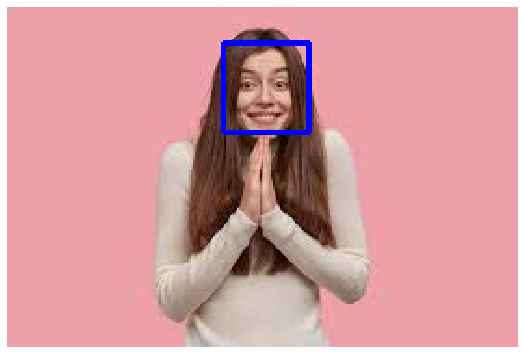

keys:
Blue box = female
green box = male

test21.jpeg
(194, 259, 3)
[[ 28  25  59  57]
 [ 96  18  69  67]
 [177  10  68  70]]
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  3


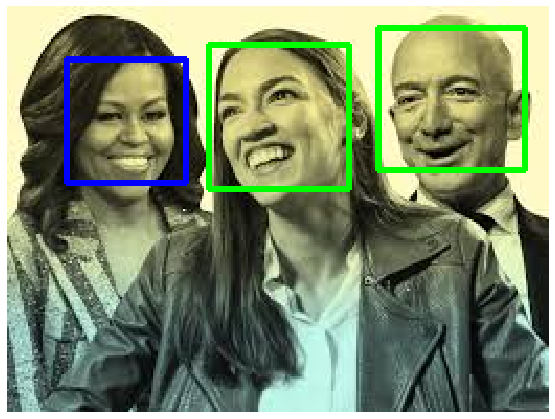

keys:
Blue box = female
green box = male

test18.jpeg
(152, 332, 3)
[[143  28  53  48]]
Found 1 images belonging to 1 classes.
Number of people:  1


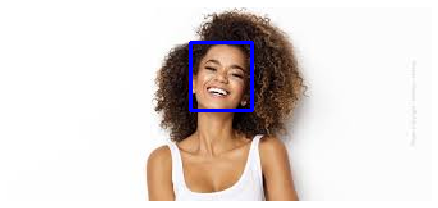

keys:
Blue box = female
green box = male

test13.jpeg
(194, 259, 3)
[[112  23  73  65]]
Found 1 images belonging to 1 classes.
Number of people:  1


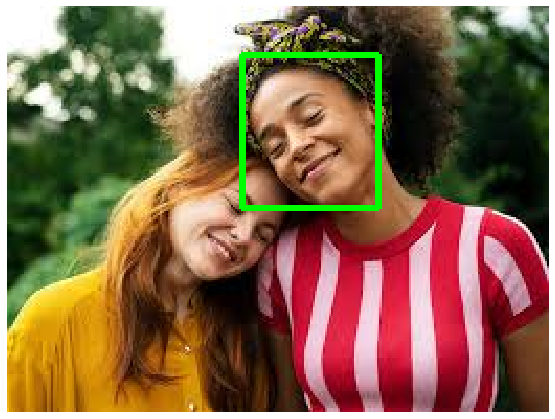

keys:
Blue box = female
green box = male

test7.jpeg
(168, 300, 3)
[[ 79   4  34  24]
 [ 22   4  33  25]
 [ 79  79  36  28]
 [256   3  36  28]
 [140  97  32  23]
 [199  93  34  25]
 [ 18  97  33  25]
 [136   5  32  23]
 [259  99  34  23]
 [201  21  34  24]]
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  10


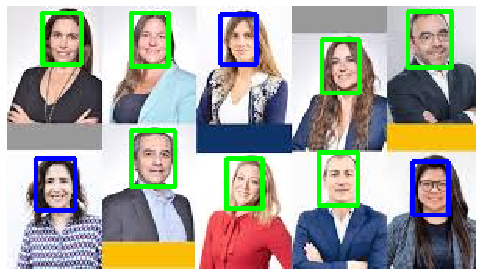

keys:
Blue box = female
green box = male

test17.jpeg
(183, 275, 3)
[[105  48  88  98]]
Found 1 images belonging to 1 classes.
Number of people:  1


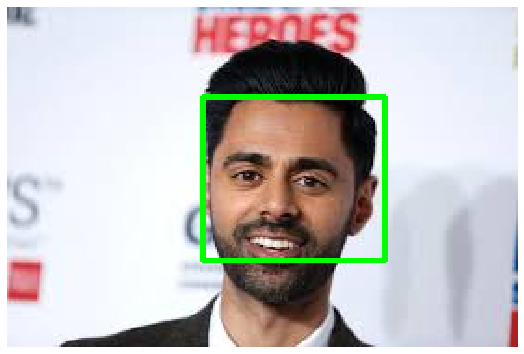

keys:
Blue box = female
green box = male

test4.jpeg
(183, 275, 3)
[[180  41  34  24]
 [ 72  39  32  23]
 [213  38  33  25]
 [108  40  33  23]
 [ 36  36  33  23]
 [142  37  34  23]]
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Number of people:  6


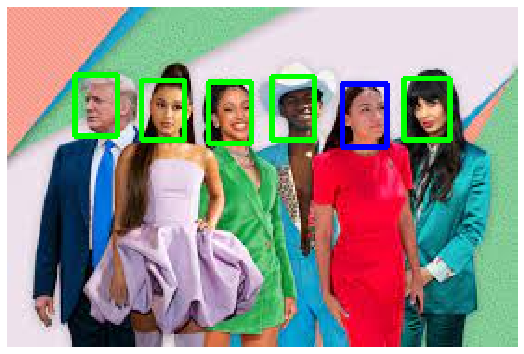

keys:
Blue box = female
green box = male



In [9]:
dirc = 'test_images/'
for image in os.listdir(dirc):
    print(image)
    result(os.path.join(dirc,image))